# **TP4 : Segmentation des images medicales par des methodes conventionnelless**
Ce notebook a pour objectif de segmenter les images médicales en utilisant des méthodes de segmentation conventionnelles. La segmentation est une étape fondamentale dans la chaine de traitement des images medicales. En effet, elle sert particulierement à identifier les regions d'intérêt sur lesquelles certains attributs seront calculés


Pour pouvoir faire les exercices de ce notebook vous devez au préalable vérifier que les nouvelles librairies suivantes sont installées (en plus de celles déjà installées lors des séances précédentes) et les installer dans le cas contraire:

- scikit-learn est une bibliothèque libre Python destinée à l'apprentissage automatique.


# L'algorithme Meanshift


Le meanshift est un algorithme non supervisé qui est principalement utilisé pour la classification. Il est largement utilisé dans l'analyse de données et particulierement pour la segmentation d'images vu qu'il n'est pas paramétrique et ne nécessite aucune forme prédéfinie de classes. La classification dans le cas des images consiste à étiqueter les pixels à chaque classe correspondante.

<img src=https://miro.medium.com/max/700/1*1RfjgZLu1qW0azt5165UPA.png width="400">


Chaque point (pixel) essaie de trouver son groupe en se déplaçant vers la moyenne pondérée de sa zone locale à chaque étape. La destination de chaque point sera le centre de gravité de la classe de données aua laquelle le point appartient. Ensuite, tous les points de données avec le même point de destination peuvent être étiquetés avec la même classes



# **Exercice 1: Segmentation par Meanshift**

L'objectif de cet exercice est d'utiliser l'algorithme de segmentation MeanShift pour identifier automatiquement les régions correspondant aux lésions cutanées sur les images de la base dermatologique ISIC2017.

Les étapes a suivre:
1. Sélectionner et lire une image à partir du dossier "Images".

2.  Appliquer un filtre médian pour réduire le bruit tout en conservant les détails importants de la structure de la peau.

3.  Convertir la matrice image sous forme d'un vecteur de données pour  appliquer le meanshift

4.  Appliquer le meanshift fonction issue de la librairie sklearn

5.  Recolorier les regions par les couleurs moyennes de l'image originale



In [ ]:
import cv2
from skimage import filters
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

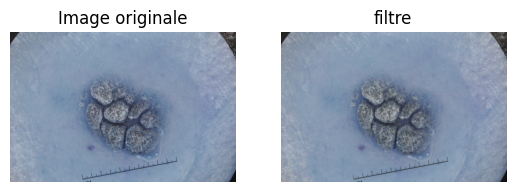

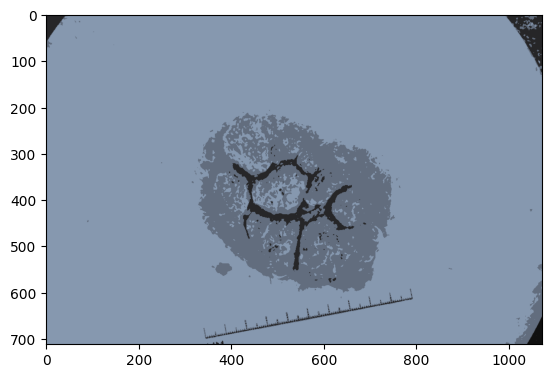

In [ ]:
image=cv2.imread("/content/drive/MyDrive/lab4 /Data_At4/Data_At4/Images/ISIC_03.jpg")
filter1=filters.median(image)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image originale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filter1)
plt.title('filtre')
plt.axis('off')
plt.show()
img=filter1.reshape(-1,3)
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

# meanshift
# Étape 4 : Estimation de la largeur de bande et application de MeanShift
bandwidth = estimate_bandwidth(flat_image, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, max_iter=300, bin_seeding=True)
ms.fit(flat_image)

# Étape 5 : Recolorier les régions en utilisant les couleurs moyennes
labeled = ms.labels_

cluster_centers = ms.cluster_centers_.astype(np.uint8)  # Centres des clusters (couleurs moyennes)

# Reconstruire l'image segmentée avec les couleurs des centres des clusters
segmented_image = cluster_centers[labeled]
segmented_image = segmented_image.reshape(image.shape)  # Reshape à la forme d'origine
plt.imshow(segmented_image)

In [ ]:
labeled=labeled.reshape(image.shape[0],image.shape[1])
print(labeled.shape)
print(labeled)

(712, 1072)
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]
 [0 0 0 ... 3 3 3]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **L'algorithme k-means**







L'algorithme k-means consiste a trouver un nombre prédéterminé de classes (par exemple 2 classes a priori) a partir d'un ensemble de données multidimensionnelles non labelisees. Pour ce faire, il utilise une conception simple pour faire un groupement optimal de points (pixels dans notre cas de figure).

Le centre de chaque classe est la moyenne arithmétique de tous les points appartenant a  chaque groupement. Chaque point est etiquete de facon a etre le plus proche de son propre centre de classe.

# **Exercice 2: segmentation par k-means**


L'objectif de cet exercice consiste à appliquer l'algorithme K-means afin d'identifier automatiquement les régions correspondantes aux lésions cutanées.

Les étapes à suivre:

1.  Lire une image originale du dossier "Images"
2.  Convertir sous la forme d'un vecteur de donnees pour  appliquer le k-means
3.  Appliquer le k-means fonction issue de la librairie sklearn afin d'avoir 2 régions



(763264, 3)
labels [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
(712, 1072)
(2848, 4288, 3)


(-0.5, 4287.5, 2847.5, -0.5)

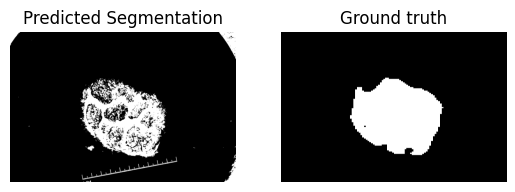

In [ ]:
image=cv2.imread("/content/drive/MyDrive/lab4 /Data_At4/Data_At4/Images/ISIC_03.jpg")
l,h,c=image.shape
image=image.reshape(-1,3)
print(image.shape)
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(image)
labels = kmeans.labels_
labels=np.reshape(labels,(l,h))
print ("labels",labels)
labels[labels == 1] = 255
print(labels.shape)

plt.subplot(1,2,1)
plt.imshow(labels,cmap='gray')
plt.title('Predicted Segmentation')
plt.axis('off')


mask=cv2.imread("/content/drive/MyDrive/lab4 /Data_At4/Data_At4/Masks/ISIC_03_segmentation.png")
plt.subplot(1,2,2)
plt.imshow(mask,cmap='gray')
print(mask.shape)
plt.title('Ground truth')
plt.axis('off')



Interpretation: on remarque des zones segmenté


## **Exercice 3: Segmentation par seuillage**

Question:
1. Lire une image de la base ISIC2017, puis afficher-là.
2. Afficher son histogramme. Distinguer les zones séparables sur histogramme.
3. Calculer manuellement un seuil de segmentation et segmenter l'image. Afficher le résultat de segmentation.
4. Calculer le seuil avec la méthode d’Otsu et affichez le résultat de la segmentation. Comparer avec le seuillage manuel.

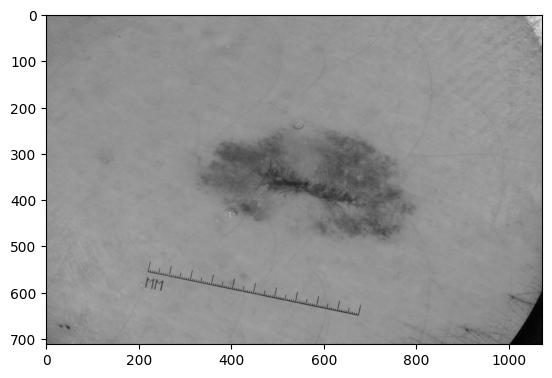

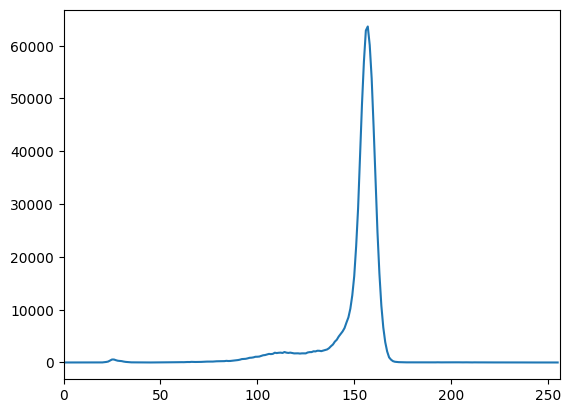

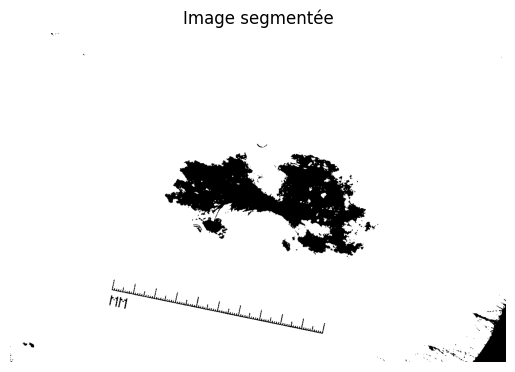

In [ ]:
image3 = cv2.imread('/content/drive/MyDrive/lab4 /Data_At4/Data_At4/Images/ISIC_02.jpg', 0)
plt.imshow(image3, cmap='gray')
plt.show()
histogram = cv2.calcHist([image3], [0], None, [256], [0, 256])
plt.figure()
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()
t=120
_, segmented_image = cv2.threshold(image3, t, 255, cv2.THRESH_BINARY)

plt.imshow(segmented_image, cmap='gray')
plt.title('Image segmentée')
plt.axis('off')  # Pour enlever les axes si nécessaire
plt.show()

Interprétation : Lihistogramme admet un seul pic. Visuellement ,on peut considèrer que la variance de la classe C2 est 0, donc on a un probleme de minimisation

Calcul manuel( initiialiser un seuil alea, puis caluculer les moyennes des deux classes et mettre a jour le seuil jusqu'a que sa variation soit infeérieur a un certain epsilon de notre choix

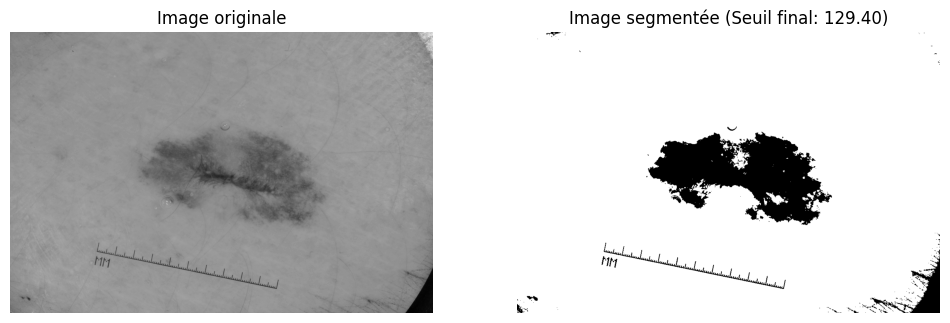

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def automatic_thresholding(image, initial_threshold=128, epsilon=10, max_iterations=100):
    # Calcul de l'histogramme
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Sélectionner un seuil initial T0 aleatoire
    T0 = initial_threshold
    iteration = 0

    while True:
        # Calculer des intensités moyennes m1 et m2 des groupes G1 et G2
        G1 = image[image < T0]
        G2 = image[image >= T0]
        m1 = np.mean(G1) if G1.size > 0 else 0
        m2 = np.mean(G2) if G2.size > 0 else 0
        T = (m1 + m2) / 2
        if abs(T - T0) < epsilon or iteration >= max_iterations:
            break

        T0 = T
        iteration += 1

    return T, T0

# Charger l'image (remplacez 'your_image.jpg' par le chemin de votre image)
image = cv2.imread('/content/drive/MyDrive/lab4 /Data_At4/Data_At4/Images/ISIC_02.jpg', cv2.IMREAD_GRAYSCALE)

# Appliquer le seuillage automatique
final_threshold, initial_threshold = automatic_thresholding(image)

# Segmenter l'image avec le seuil final
_, segmented_image = cv2.threshold(image, final_threshold, 255, cv2.THRESH_BINARY)

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Image segmentée (Seuil final: {final_threshold:.2f})')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()


####Le calcul mannuel du seuil prend un temps de calcul important

Méthodes d'Otsu

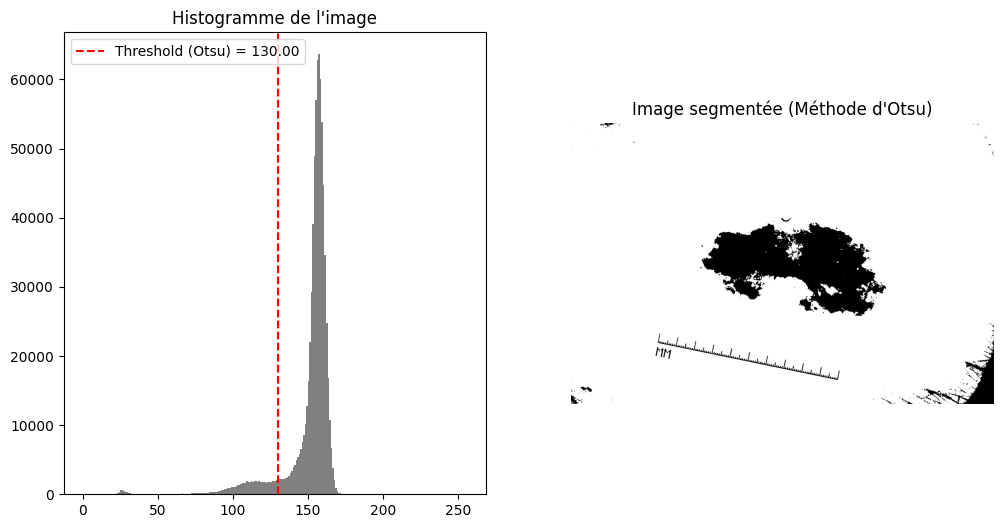

In [ ]:
# Calculer le seuil avec la méthode d'Otsu
otsu_threshold = filters.threshold_otsu(image3)

# Segmenter l'image
_, segmented_image_otsu = cv2.threshold(image3, otsu_threshold, 255, cv2.THRESH_BINARY)

# Afficher l'histogramme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Histogramme de l\'image')
plt.hist(image3.ravel(), bins=256, range=(0, 256), color='gray')
plt.axvline(x=otsu_threshold, color='r', linestyle='--', label=f'Threshold (Otsu) = {otsu_threshold:.2f}')
plt.legend()

# Afficher l'image segmentée
plt.subplot(1, 2, 2)
plt.title('Image segmentée (Méthode d\'Otsu)')
plt.imshow(segmented_image_otsu, cmap='gray')
plt.axis('off')

# Afficher les graphiques
plt.show()

### La valeur du seil d'otsu est proche du seuil manuelle; Le choix d'epsilon dans le calcul manuelest a l'origine de cette différeence. Les deux algorithmes donnent visuellement des images segmentées presque identiques.

# Evaluation de segmentation d'image medicale

Dan le cas de la segmentation medicale, deux metriques sont souvent utilisées afin d'évaluer les résultats de la segmentation. Il s'agit de :


*   La valeur de Dice (Dc)
<img src=https://pbs.twimg.com/media/EWci84bWsAIBWvV.png width="200">

*   La valeur de Jaccard ou Intersection of Union (IoU)

<img src=https://miro.medium.com/max/744/1*XiLRKr_Bo-VdgqVI-SvSQg.png width="400">


# **Exercice 4 : Evaluation de la segmentation binaire par Dice et IoU**

Le travail demandé consiste à :

1.   À partir des segmentations obtenues par Meanshift et k-means sur les images de la base ISIC, déterminer les masques binaires des lésions cutanées.
2.   Développer le code python permettant de calculer la valeur de dice
3.   Développer le code python permettant de calculer la valeur de IoU
4. Calculer le temps de traitement de chaque algorithme de segmentation.
5.  Comparer les performances et le temps de calcul des résultats de segmentation et interpréter.



(712, 1072)
(712, 1072)


<function matplotlib.pyplot.show(close=None, block=None)>

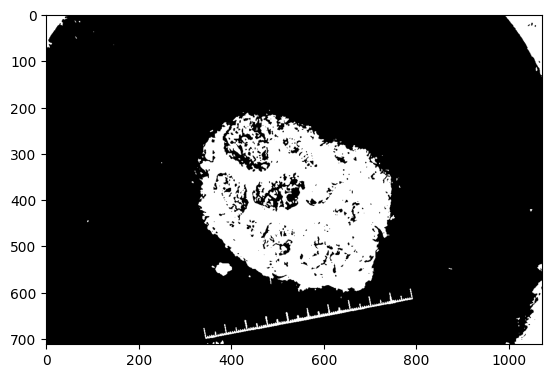

In [ ]:
gray_segmented = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)
_, binary_image = cv2.threshold(
    gray_segmented, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
binary_image = cv2.bitwise_not(binary_image)
print(binary_image.shape)
mask=cv2.imread("/content/drive/MyDrive/lab4 /Data_At4/Data_At4/Masks/ISIC_03_segmentation.png")
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
resized_mask = cv2.resize(gray_mask, (binary_image.shape[1], binary_image.shape[0]))
print(resized_mask.shape)
plt.imshow(binary_image, cmap='gray')
plt.show

In [ ]:
def dice(image,mask):
  l,h=image.shape
  union=0
  intersection=0
  for i in range(l):
    for j in range(h):
      if ((image[i,j]==255) and (mask[i,j]==255)):
        intersection+=1
      if ((image[i,j]==255) or (mask[i,j]==255)):
        union+=1
  return (2*intersection)/union
def IoU(image, mask):
    # Ensure the input shapes match
    if image.shape != mask.shape:
        raise ValueError("Image and mask must have the same shape")

    intersection = np.sum((image == 255) & (mask == 255))
    union = np.sum((image == 255) | (mask == 255))

    # Handle case where union is 0 to avoid division by zero
    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    return intersection / union


Calcul des metriques pour Meanshift

In [ ]:
meanshift_dice=dice(binary_image,resized_mask)
meanshift_IoU=IoU(binary_image,resized_mask)
print("Dice coefficient:", meanshift_dice)
print("IoU:", meanshift_IoU)

Dice coefficient: 1.362498732673841
IoU: 0.6812493663369205


Calcul des metriques pour K-means

In [ ]:
kmeans_dice=dice(labels,resized_mask)
kmeans_IoU=IoU(labels,resized_mask)
print("Dice coefficient:", kmeans_dice)
print("IoU:", kmeans_IoU)

Dice coefficient: 1.1876485646370452
IoU: 0.5938242823185226


L'algorithme Meanshift donne des résultats plus meilleurs que celles données par par K-means, mais avec un temps de calcul plus important.

# **Exercice de recherche : Segmentation par contours actifs**
Dans cet exercice de recherche, vous êtes invités à comprendre et appliquer l'algorithme Level-set basé sur la segmentation par les contours actifs. Évaluer et comparer le résultat obtenu avec le reste des segmentations testés dans ce TP.


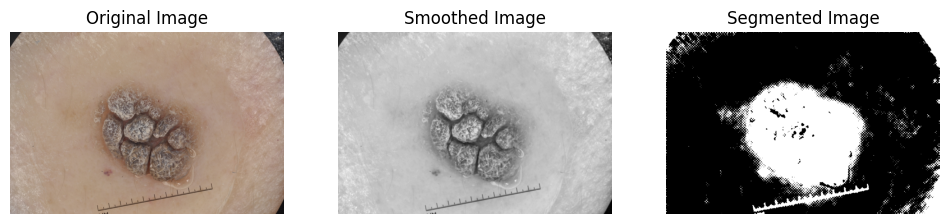

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.segmentation import chan_vese

# Step 1: Load the Image
image = io.imread("/content/drive/MyDrive/lab4 /Data_At4/Data_At4/Images/ISIC_03.jpg")
gray_image = color.rgb2gray(image)

# Step 2: Preprocess the Image
# Optional: Apply Gaussian filter to smooth the image
smoothed_image = filters.gaussian(gray_image, sigma=1)
cv_segments = chan_vese(smoothed_image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3)
# Convert boolean segmentation mask to uint8 format
cv_segments_uint8 = (cv_segments * 255).astype(np.uint8)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Smoothed Image')
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Segmented Image')
plt.imshow(cv_segments, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
con_act=dice(cv_segments_uint8,resized_mask)
con_act_IoU=IoU(cv_segments_uint8,resized_mask)
print("Dice coefficient:", con_act)
print("IoU:", con_act_IoU)

Dice coefficient: 1.1931511894150864
IoU: 0.5965755947075432
